## Daniel Mccue

## NHL Player Salaries Analysis & Prediction (Stats from 2016-17 regular season)

Last Updated: January 2025

- A comprehensive analysis of NHL player salaries using machine learning to predict 
compensation and identify market inefficiencies. 
- Features XGBoost and Lasso regression models trained on 15+ performance metrics, achieving an RSME of $1.7m



In [300]:
## Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

## Exploratory Data Analysis

This section examines the NHL player dataset (789 players) from 2017, analyzing key statistics and their relationships with player salaries. 
The dataset includes 154 features covering performance metrics, physical attributes, and career statistics. 
Initial findings show:
- Salary range: $575K to $14M with mean of $2.48M
- Average player age: 26 years (born 1991)
- Key performance indicators: Points (PTS), Goals Scored (GS), and Fenwick For (FF)


In [301]:
df = pd.read_csv('NHL_Salaries_ELC_Removed.csv', encoding='iso-8859-1')

df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,14000000.0,1991-08-25,Jesenice,NaN,SVN,SVN,75.0,224.0,2005.0,1.0,...,92.0,2.6,1.9,4.6,2991.58,165.0,8.2,113.9,60.0,0.79
1,13800000.0,1988-11-19,Buffalo,NY,USA,USA,71.0,177.0,2007.0,1.0,...,91.0,8.7,2.1,10.8,3057.71,75.0,4.8,114.0,89.2,1.09
2,13800000.0,1988-04-29,Winnipeg,MB,CAN,CAN,74.0,201.0,2006.0,1.0,...,78.0,4.7,1.6,6.3,2866.62,111.0,5.3,116.8,62.4,0.87
3,12000000.0,1985-08-14,Sicamous,BC,CAN,CAN,76.0,232.0,2003.0,2.0,...,115.0,4.1,6.0,10.1,2759.46,335.0,7.9,110.3,53.9,0.69
4,11000000.0,1995-02-08,Clinton,ON,CAN,CAN,73.0,210.0,2009.0,2.0,...,87.0,4.0,1.9,6.0,2809.55,76.0,19.8,117.7,57.7,0.80


In [302]:
# Print the number of rows
print("Number of rows (players):", df.shape[0])

# number of columns
print("Number of columns (attributes):", df.shape[1])

df.describe()


Number of rows (players): 874
Number of columns (attributes): 154


,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,7.890000e+02,789.000000,789.000000,664.000000,664.000000,664.000000,789.000000,789.000000,789.000000,789.000000,...,788.000000,789.000000,789.000000,789.000000,788.000000,789.000000,789.000000,788.000000,788.000000,787.000000
mean,2.483054e+06,73.082383,201.566540,2007.951807,2.864458,72.417169,51.757921,7.683143,13.051965,7.228137,...,48.177665,1.297592,1.327250,2.626869,2059.012132,132.666667,9.434094,108.841117,22.172843,0.343011
std,2.365233e+06,2.122410,14.704179,4.067763,2.016449,64.012176,28.702101,8.497595,12.620931,7.469985,...,33.337692,1.979311,1.349113,2.805594,1138.084201,101.899381,7.766916,8.598547,21.681661,0.287410
min,5.750000e+05,66.000000,157.000000,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.700000,-0.200000,-1.200000,33.510000,0.000000,0.000000,75.000000,-4.300000,-0.590000
25%,7.250000e+05,72.000000,191.000000,2005.000000,1.000000,19.000000,25.000000,1.000000,2.000000,1.000000,...,17.000000,0.000000,0.300000,0.200000,1019.362500,53.000000,4.800000,104.700000,3.000000,0.150000
50%,1.100000e+06,73.000000,201.000000,2009.000000,2.000000,54.000000,62.000000,5.000000,10.000000,5.000000,...,47.000000,0.400000,1.000000,1.800000,2471.875000,121.000000,7.900000,109.150000,16.200000,0.310000
75%,4.000000e+06,75.000000,211.000000,2011.000000,4.000000,112.000000,78.000000,12.000000,20.000000,11.000000,...,74.000000,2.300000,1.900000,4.300000,3030.462500,197.000000,12.000000,113.900000,36.300000,0.530000
max,1.400000e+07,81.000000,260.000000,2013.000000,9.000000,291.000000,82.000000,44.000000,63.000000,38.000000,...,137.000000,10.500000,7.200000,15.300000,3527.100000,622.000000,61.000000,156.600000,99.200000,1.260000


## Data Preprocessing & Feature Engineering

Transforming raw NHL statistics into meaningful predictive features through:
- Age calculation from birth dates
- Experience derivation from draft years
- Position standardization (Defense/Center/Wing)
- Advanced metric computation (e.g., teamNetRebound)
- Handling of undrafted players (220 per year average)


In [303]:
#Preliminary Data Analysis


# Convert the Born column to datetime using the correct format
df['Born'] = pd.to_datetime(df['Born'])

# Calculate age
df['Age'] = 2017 - df['Born'].dt.year

# Experience
df['Xp'] = 2017 - df['DftYr']

# Draft pos to single value 
df['Ovrl'] += 30 * df['DftRd']
df = df.drop('DftRd', axis=1)

# Undrafted to numerical representation (about 220 players drafted each year)
df['Ovrl'] = df['Ovrl'].fillna(220)

#More over-arching rebound stat
    # The team's rebounds while this player was on the ice - Rebounds allowed while this player was on the ice
df['teamNetRebound'] = df['RBF'] - df['RBA']

# Position adjustments
    # Players who play defense and offense are generally defensemen
    # Players who play center and wing are generally centers
    # Wing is wing
df['Position'] = df['Position'].apply(lambda x: 
    'D' if isinstance(x, str) and 'd' in x.lower() else
    'C' if isinstance(x, str) and 'c' in x.lower() else
    'W' if isinstance(x, str) and 'w' in x.lower() else
    x
)

#Players listed for multiple teams messes with team salary visualizations, for this sake just keep team started year with
df['Team'] = df['Team'].str.split('/').str[0]

# More rookie contracts
players_to_remove = ['Wennberg', 'Horvat', 'Sheary', 'Teravainen']
df = df[~df['Last Name'].isin(players_to_remove)]

# Handle the two icf collumns by creating one out of an avg of both
    # Merge the two iCF columns by averaging their values
df['iCF'] = df[['iCF', 'iCF.1']].mean(axis=1)
    # Remove the duplicate column
df = df.drop('iCF.1', axis=1)

# Same with isf
df['iSF'] = df[['iSF', 'iSF.1', 'iSF.2']].mean(axis=1)
df = df.drop('iSF.1', axis=1).drop('iSF.2', axis=1)


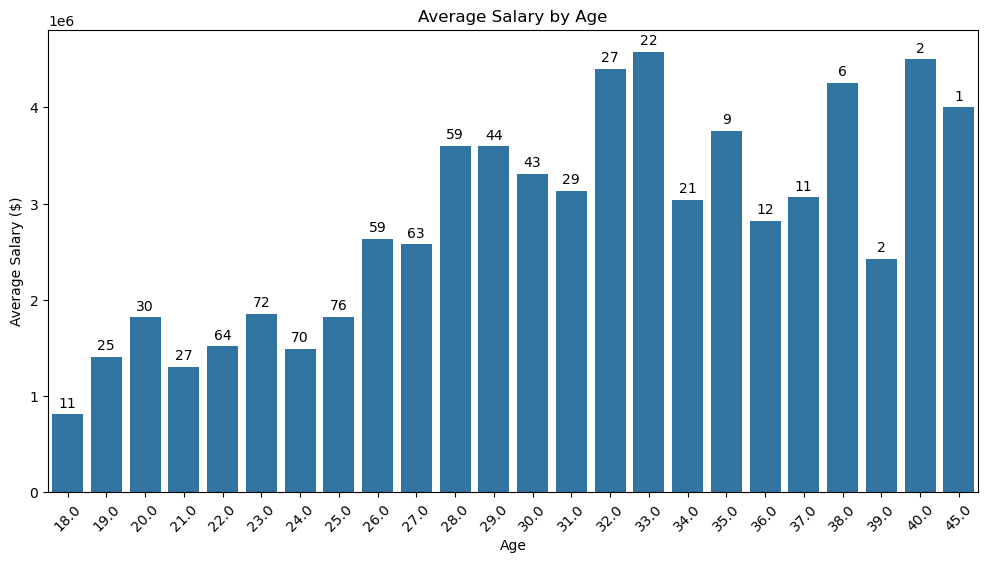

In [304]:
# Salary by age

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Age', y='Salary', errorbar=None)

# Player count annotations
for i in ax.containers:
    counts = df['Age'].value_counts().sort_index()
    ax.bar_label(i, labels=counts, padding=3)

plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.show()

- Young players are typically paid far less, aside from the few highly skilled young stars that always seem to arise.
- Gernerally highest paid during player's late 20s to early 30s (generally considered a players 'prime' age for preformance)
- Fewer older players in the league, although the few are generally paid very high (especially when compared to current production) likely due to factors like experience, past-season production, or even just reputation. It's also very likely that older players who could play for lower salaries choose not to, as they've already made their money and may not find the physical risk worth it anymore.

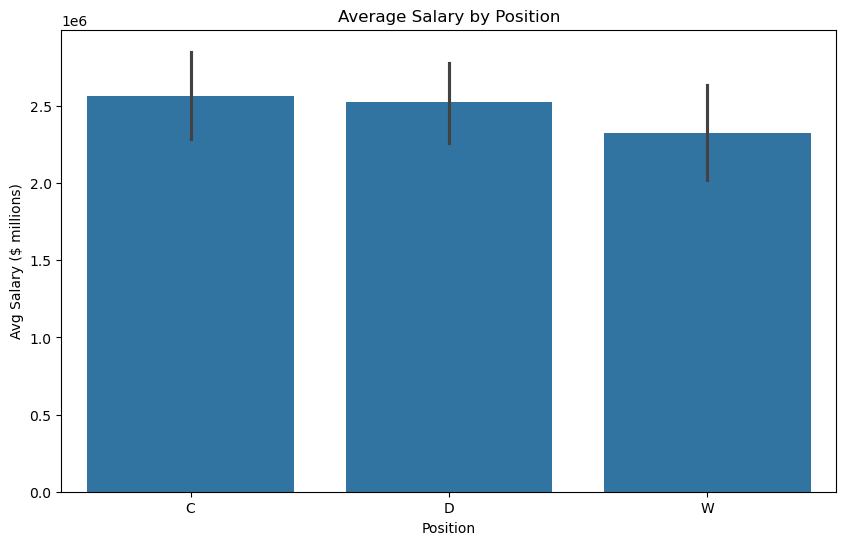

In [305]:
# Salary by position 

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Position', y='Salary')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Avg Salary ($ millions)')
plt.show()

- Center is the highest paying position on average. This makes sense as it is likely the most vital skater position, responsible for the strongest combination of both offense and defensive play. 
- Defense is second, likely due to the smaller number of them per roster, NHL caliber defenseman are typically more rare than a winger, just due to the added difficulty demanded by the nature of the position.
- Left/Right wingers are generally paid the least, likely due to the relative ease of the position (not much responsibility demanded in the defensive zone, generally simpler more straightforward position)

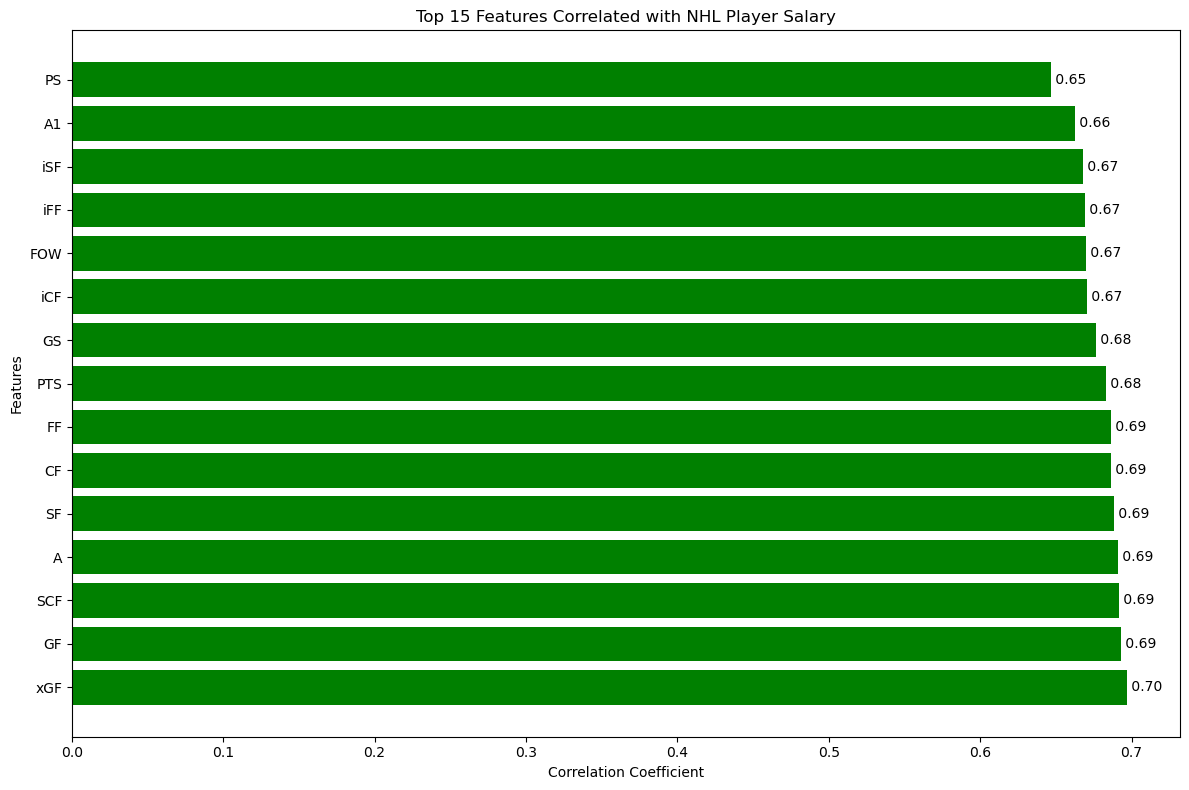

In [306]:
# Get only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Get correlations with salary and sort by absolute value
salary_correlations = df[numerical_cols].corr()['Salary']
salary_correlations_abs = salary_correlations.abs().sort_values(ascending=False)

# Get top 15 features by absolute correlation value, excluding salary self-correlation
top_15_abs = salary_correlations[salary_correlations_abs.index[1:17]]
top_15_abs = top_15_abs[top_15_abs.index != 'FOL']  # Team face-off losses shouldnt be a factor

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in top_15_abs.values]
plt.barh(top_15_abs.index, top_15_abs.values, color=colors)
plt.title('Top 15 Features Correlated with NHL Player Salary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add correlation values on the bars
for i, v in enumerate(top_15_abs.values):
    plt.text(v, i, f' {v:.2f}', va='center')

plt.tight_layout()
plt.show()

1. xGF: The team's expected goals (weighted shots) while this player was on the ice, which is shot attempts weighted by location.

2. GF: Team's goals for with player on ice

3. SCF: Team's scoring chances with this player on ice

4. SF: The team's shots on goal with this player on ice   CF: The team's shot attempts (Corsi) while this player was on the ice

5. CF: The team's shot attempts (Corsi) while this player was on the ice

6. FF: The team's unblocked shot attempts (Fenwick) while this player was on the ice

7. A: Assists 

8. PTS: Player points

9. GS: Player's combined game score. Game score weights each of the actions of each player to give us a single number representing their overall performance in that game. Game Score includes goals, assists, shots on goal, penalties drawn and taken, faceoffs won and lost, blocked shots, 5v5 goal differential, and 5v5 Corsi differential. Each action is weighted differently in the formula. For example, one goal scored is worth more than one blocked shot.

10. iCF: Shot attempts taken by individual (Individual Corsi)

11. FOW: Team face-off wins with player on ice 

12. iFF: Unblocked shot attempts taken by this individual (Fenwick individual)

13. iSF: Individual shots on goal

14. A1: Primary Assists only

15. PS: Point share. This is a catch-all stat which measures a player's contribution towards points in the standings


## Model Development

In [307]:
# Common Data Preparation 

# Get features from top correlations (excluding FOL)
features = top_15_abs.index.tolist()

# Prepare data with null removal
df = df.dropna(subset=features)
X = df[features].dropna()  # Remove rows with nulls in any of these columns
y = df['Salary'].loc[X.index]  # Get corresponding salary values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## XGBoost Model

- Utilize XGBoost to determine the most important factors in player compensation, based on optimal parameters discovered through repeated model training.

In [308]:
# XGBoost parameter grid
xgb_params = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.29),  # uniform between 0.01 and 0.3
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4)  # uniform between 0.6 and 1.0
}

# Initialize and fit RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_params,
    n_iter=20,  # number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train_scaled, y_train)

# Get XGBoost results
xgb_best_params = xgb_random.best_params_

print("Best XGBoost Parameters:", xgb_best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Parameters: {'learning_rate': 0.07030308223177476, 'max_depth': 6, 'n_estimators': 103, 'subsample': 0.6125253169822235}


XGBoost Cross-Validation Results: Mean (std)
Average RMSE: $1,730,462.92 (+/- $151,173.26)
Average R²: 0.445 (+/- 0.058)


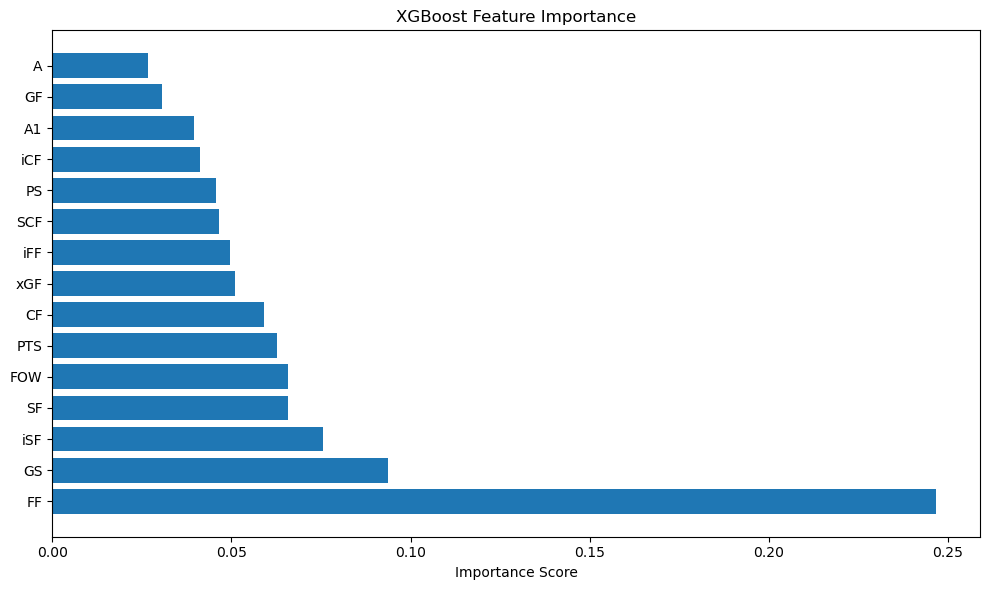

In [309]:
# Initialize XGBoost model using optimal params
xgb_model = XGBRegressor(random_state=42, n_estimators = 103, learning_rate = .0703, max_depth = 6, subsample = .6125)

# First fit the model
xgb_model.fit(X_train_scaled, y_train)

# Then do cross-validation
xgb_rmse_scores = np.sqrt(-cross_val_score(xgb_model, X_train_scaled, y_train, 
                                         scoring='neg_mean_squared_error', 
                                         cv=5))
xgb_r2_scores = cross_val_score(xgb_model, X_train_scaled, y_train, 
                              scoring='r2', 
                              cv=5)

# Now you can get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print results
print("XGBoost Cross-Validation Results: Mean (std)")
print(f"Average RMSE: ${np.mean(xgb_rmse_scores):,.2f} (+/- ${np.std(xgb_rmse_scores):,.2f})")
print(f"Average R²: {np.mean(xgb_r2_scores):.3f} (+/- {np.std(xgb_r2_scores):.3f})")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


Based on the XGBoost Cross-Validation results, the Average RMSE is $1,730,462.92 (+/- $151,173.26). This indicates the average prediction error in dollars for the salary predictions using the XGBoost model.

- An R² value of 0.445 (+/- 0.058), indicating it explains about 44% of the variance in salary predictions
- An RMSE of approximately $1.73M, the average prediction error
- A clear feature importance ranking with FF, GS, and iSF as the strongest predictors

## Lasso Model

- Utilize Lasso Regression to determine the most important factors in player compensation, based on optimal parameters discovered through repeated model training.

In [310]:
#Find Optimal Parameters

# Lasso parameter grid
lasso_params = {
    'alpha': uniform(0.001, 10),
    'max_iter': randint(11000, 30000),
    'tol': uniform(0.0001, 0.001)
}

# Initialize and fit RandomizedSearchCV for Lasso
lasso_random = RandomizedSearchCV(
    Lasso(random_state=42),
    param_distributions=lasso_params,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1
)

lasso_random.fit(X_train_scaled, y_train)

# Get Lasso results
lasso_best_params = lasso_random.best_params_

# Print results
print("\nBest Lasso Parameters:", lasso_best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+12, tolerance: 5.103e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+12, tolerance: 4.989e+11
  model = cd_fast.enet_coordinate_descent(



Best Lasso Parameters: {'alpha': 9.423017556848526, 'max_iter': 21253, 'tol': 0.0009083973481164612}



Lasso Cross-Validation Results: Mean (std)
Average RMSE: $1,696,769.89 (+/- $176,358.98)
Average R²: 0.470 (+/- 0.030)


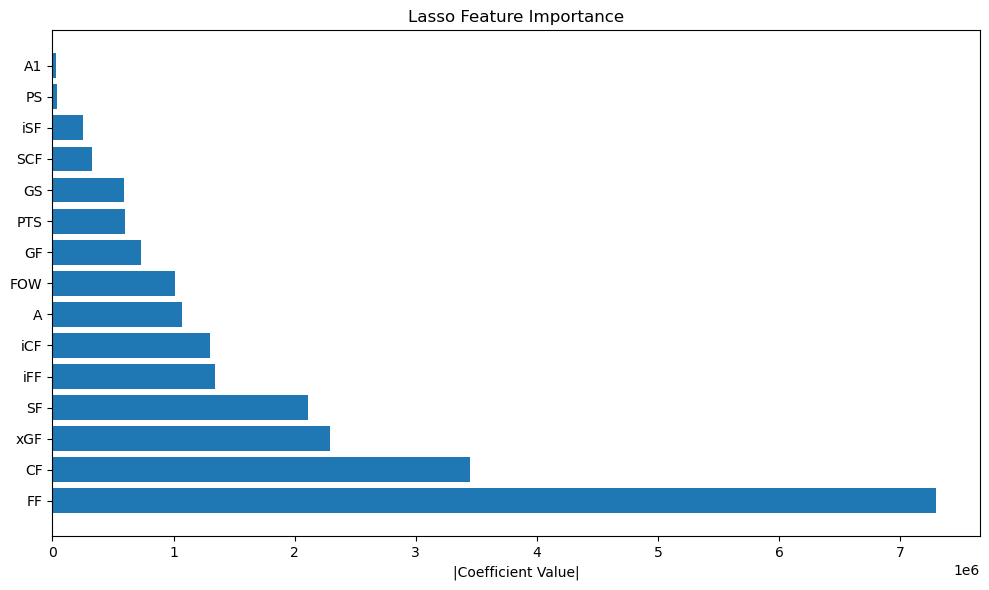

In [311]:
# Initialize Lasso using optimal params
lasso_model = Lasso(alpha=9.423017556848526, random_state=42, max_iter=21253, tol=0.0009083973481164612)

# First fit the model
lasso_model = lasso_model.fit(X_train_scaled, y_train)

# Then do cross-validation
lasso_rmse_scores = np.sqrt(-cross_val_score(lasso_model, X_train_scaled, y_train, 
                                           scoring='neg_mean_squared_error', 
                                           cv=5))
lasso_r2_scores = cross_val_score(lasso_model, X_train_scaled, y_train, 
                                scoring='r2', 
                                cv=5)

# Lasso Feature Importance
lasso_importance = pd.DataFrame({
    'feature': features,
    'importance': np.abs(lasso_model.coef_)
})
lasso_importance = lasso_importance.sort_values('importance', ascending=False)

# Print Lasso results
print("\nLasso Cross-Validation Results: Mean (std)")
print(f"Average RMSE: ${np.mean(lasso_rmse_scores):,.2f} (+/- ${np.std(lasso_rmse_scores):,.2f})")
print(f"Average R²: {np.mean(lasso_r2_scores):.3f} (+/- {np.std(lasso_r2_scores):.3f})")

plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['feature'], lasso_importance['importance'])
plt.title('Lasso Feature Importance')
plt.xlabel('|Coefficient Value|')
plt.tight_layout()
plt.show()


Based on the Lasso Cross-Validation results, the Average RMSE is $1,696,769.89 (+/- $176,358.98). This indicates the average prediction error in dollars for the salary predictions using the Lasso model.

- An R² value of 0.470 (+/- 0.030), indicating it explains about 47% of the variance in salary predictions
- An RMSE of approximately $1.69M, the average prediction error
- A clear feature importance ranking with FF, CF, and xGF as the strongest predictors

## Model Performance Comparison

Accuracy Metrics:

- XGBoost achieved 44.5% accuracy (R² = 0.445 ± 0.058) with RMSE of $1.73M
- Lasso achieved 47.0% accuracy (R² = 0.470 ± 0.030) with RMSE of $1.69M

Feature Importance Analysis:

- XGBoost identified Fenwick For (FF) as the strongest predictor, followed by Goals Scored (GS) and Individual Shot Frequency (iSF)
- Lasso model emphasized similar metrics but with different weights, showing FF, xGF (Expected Goals For), and CF (Corsi For) as top predictors


While both models achieved similar performance metrics, Lasso showed slightly better accuracy with lower variance in predictions. The models agree on the importance of shot flow statistics (FF, CF) and goal-scoring metrics, suggesting these are robust predictors of player salaries regardless of modeling approach. For more in depth predictions we will continue with soley the Lasso Regression model, due to it's slightly increased accuracy

## Prediction Analysis

- Continuation with the Lasso model to predict player salaries, identify over/under paid players through comparison of their actual contracts, determine which contracts + players the model finds best, visualization of salary descrepancies across teams

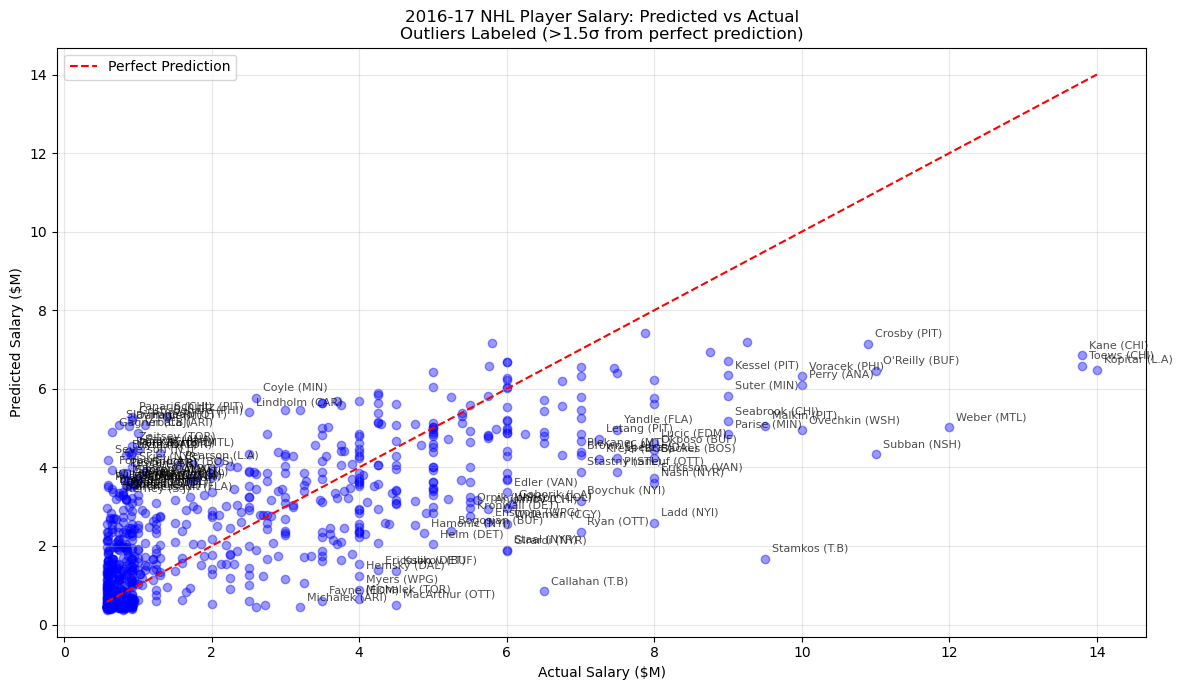

Difference = Predicted - Actual

Top 10 Most Overpaid Players (Actual > Predicted):
  Player Team  Actual  Predicted  Difference
 Stamkos  T.B     9.5   1.671265   -7.828735
 Kopitar  L.A    14.0   6.478144   -7.521856
   Toews  CHI    13.8   6.591322   -7.208678
   Weber  MTL    12.0   5.020616   -6.979384
    Kane  CHI    13.8   6.857871   -6.942129
  Subban  NSH    11.0   4.330033   -6.669967
Callahan  T.B     6.5   0.846184   -5.653816
    Ladd  NYI     8.0   2.591465   -5.408535
Ovechkin  WSH    10.0   4.946087   -5.053913
    Ryan  OTT     7.0   2.363650   -4.636350

Top 10 Most Underpaid Players (Actual < Predicted):
      Player Team  Actual  Predicted  Difference
     Panarin  CHI  0.9250   5.292501    4.367501
      Slavin  CAR  0.7425   5.084022    4.341522
Gostisbehere  PHI  0.9250   5.196522    4.271522
      Gagner  CBJ  0.6500   4.888606    4.238606
     Danault  MTL  0.8750   5.062865    4.187865
      Pageau  OTT  1.1000   5.090147    3.990147
     Schultz  PIT  1.4000

In [312]:
# First get predictions for all players
all_predictions = lasso_model.predict(scaler.transform(df[features]))

# Then create the prediction DataFrame with all required columns
prediction_df = pd.DataFrame({
    'Actual': df['Salary'] / 1_000_000,  # Convert to millions
    'Predicted': all_predictions / 1_000_000,  # Convert to millions
    'Difference': (all_predictions - df['Salary']) / 1_000_000,  # Convert to millions
    'Player': df['Last Name'],
    'Team': df['Team']
})

# Add absolute difference column
prediction_df['Abs_Difference'] = abs(prediction_df['Difference'])


# Create prediction vs actual plot with outlier labels
plt.figure(figsize=(12, 7))

# Scatter plot of all players
plt.scatter(prediction_df['Actual'], prediction_df['Predicted'], alpha=0.4, color='blue')

# Perfect prediction line
plt.plot([prediction_df['Actual'].min(), prediction_df['Actual'].max()], 
         [prediction_df['Actual'].min(), prediction_df['Actual'].max()], 
         'r--', label='Perfect Prediction')

# Find outliers (players with large differences between actual and predicted)
# Using 1.5 standard deviations as threshold
diff_std = prediction_df['Difference'].std()
outlier_threshold = 1.5 * diff_std
outliers = prediction_df[abs(prediction_df['Difference']) > outlier_threshold]

# Label outliers
for _, player in outliers.iterrows():
    plt.annotate(f"{player['Player']} ({player['Team']})", 
                (player['Actual'], player['Predicted']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8,
                alpha=0.7)

# Formatting
plt.xlabel('Actual Salary ($M)')
plt.ylabel('Predicted Salary ($M)')
plt.title('2016-17 NHL Player Salary: Predicted vs Actual\nOutliers Labeled (>1.5σ from perfect prediction)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("Difference = Predicted - Actual")

print("\nTop 10 Most Overpaid Players (Actual > Predicted):")
print(prediction_df[prediction_df['Difference'] < 0]
      .nlargest(10, 'Abs_Difference')[['Player', 'Team', 'Actual', 'Predicted', 'Difference']]
      .to_string(index=False))

print("\nTop 10 Most Underpaid Players (Actual < Predicted):")
print(prediction_df[prediction_df['Difference'] > 0]
      .nlargest(10, 'Abs_Difference')[['Player', 'Team', 'Actual', 'Predicted', 'Difference']]
      .to_string(index=False))


- Stamkos jumps out as a burglar here, mainly because he only played 17 games due to a meniscus tear and slew of other conditions. It's clear in other seasons why he deserves that paycheck, it's just the case that the data from this season alone does not support it.

- The high-salary outliers (Kopitar $14M, Kane $13.8M, Toews $13.8M) represent franchise cornerstone players whose compensation includes factors beyond pure statistical performance, such as leadership, playoff success, and market value. While their statistical output may not fully align with their salaries, these contracts often reflect their broader value to their organizations. 
    - This data also relies on actual salary (not cap hit). This is an issue that will be fully addressed later on, but effects mainly higher end players (as they will have the leaway and higher numbers, allowing their contracts to be unequally disperesed among the years remaining on their deal). * Their true cap-hits this year was: Koptar $10m, Kane & Toews $10.5m, a couple million dollars closer to the model's prediction.
    - It's more the guys like Callahan, Ladd and Ryan that are veiwed as bad contracts for their teams here.

- There were definitely some leftover Entry Level Contracts (ELC) in this dataset, where rookies/newer players are capped at a certain salary (usually under or around $1m). However I'll keep these couple players in just to show how often it is some of the leagues youngest that are the most severely underpaid. (Dataset was supposed to contain non-ELC only)
    - For example panarin shouldnt be here, but he's my favorite player. He came over to the NHL the year prior, from Russia at an older age than most rookies, yet was still subject to an ELC, signing a deal clearly not suited for his skill level. Subsequently on 26 December of 2016, Panarin signed a new two-year $12 million contract with Chicago effective for the 2017–18 and 2018–19 seasons ($6m AAV). Meaning his then yearly salary would be right around our prediction of $5-6m

- Most underpaid players are making about $1m or less (these are likely 2-way contracts, meant for players who may split time in the minor leagues). May indicate the underappreciation of some of these journey-men players, as the model thinks they should be making more or equal to amounts made by other, older NHL staples.

- Ryan Callahan (TB): Contract was traded to Ottawa Senators in 2019 for cap relief. Placed on long-term injured reserve due to degenerative disc disease, effectively ending his career.

- Andrew Ladd (NYI); Model predicted much lower than his $5.5M salary. Was traded to Arizona Coyotes in 2021 with additional draft picks as sweeteners. Retired in September 2023 after knee issues.

- Justin Schultz’s Breakout Year: 2016-17 was his career-best season with 51 points (12 goals, 39 assists) in 78 games, as he spent most of the year filling in for star defensemen Kris Letang, who suffered a herniated disk in his neck half-way through the season. Significant improvement from previous year (18 points in 63 games). Earned NHL All-Star votes and finished 10th in Norris Trophy voting all while playing on a $1.4M contract, providing excellent value for Pittsburgh and clearly recognized by the model.


Contract Outcomes - The model appears to have correctly identified several problematic contracts:

- Teams had to attach assets to move Ladd’s contract

- Callahan’s contract required a trade for cap relief

- Multiple ended 'over-payments' ended in buyouts, trades, or placement on the LTIR (Long Term Injured Reserve), all likely for the purpose of salary cap relief
    
- High-salary players like Kane and Toews eventually took significant pay cuts in subsequent contracts

The analysis shows the model was effective at identifying overvalued contracts that teams later needed to move or modify, though it may have underestimated the market value of certain elite players like Stamkos and Ovechkin.

## Perfect Predictions

- Here we can more clearly see every scenario where the model near-perfectly predicted a player's salary for that year

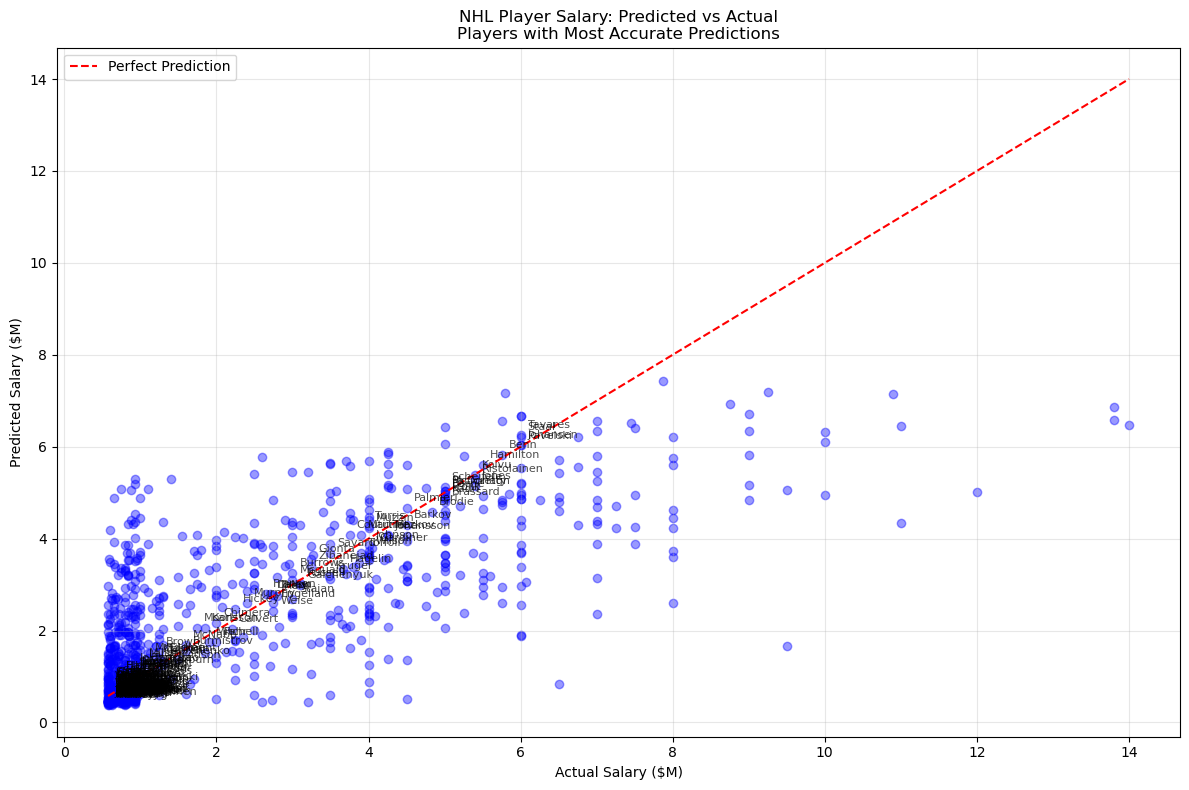


Top 15 Most Accurate Predictions:
    Player Team  Actual  Predicted  Difference
  Koekkoek  T.B  $0.83M     $0.83M      $0.00M
     Koivu  MIN  $5.40M     $5.39M     $-0.01M
   Kampfer  FLA  $0.62M     $0.62M     $-0.01M
    Hanley  MTL  $0.60M     $0.59M     $-0.01M
    Strait  WPG  $0.60M     $0.59M     $-0.01M
    Kuraly  BOS  $0.69M     $0.68M     $-0.02M
  Oesterle  EDM  $0.58M     $0.56M     $-0.02M
     Hudon  MTL  $0.57M     $0.55M     $-0.02M
  Mitchell  MIN  $0.64M     $0.61M     $-0.03M
    Dillon  S.J  $2.75M     $2.78M      $0.03M
  Pavelski  S.J  $6.00M     $6.03M      $0.03M
Pacioretty  MTL  $5.00M     $5.03M      $0.03M
    Barrie  COL  $5.00M     $4.97M     $-0.03M
     Brown  CAR  $0.65M     $0.62M     $-0.03M
    Nelson  BUF  $0.65M     $0.61M     $-0.04M


In [313]:
# Create prediction vs actual plot focusing on accurate predictions
plt.figure(figsize=(12, 8))

# Scatter plot of all players
plt.scatter(prediction_df['Actual'], prediction_df['Predicted'], alpha=0.4, color='blue')

# Perfect prediction line
plt.plot([prediction_df['Actual'].min(), prediction_df['Actual'].max()], 
         [prediction_df['Actual'].min(), prediction_df['Actual'].max()], 
         'r--', label='Perfect Prediction')

# Find players with very accurate predictions
# Using 0.2 standard deviations as threshold for "close to perfect"
diff_std = prediction_df['Difference'].std()
threshold = 0.2 * diff_std
accurate_predictions = prediction_df[abs(prediction_df['Difference']) < threshold]

# Label accurate predictions
for _, player in accurate_predictions.iterrows():
    plt.annotate(f"{player['Player']}", 
                (player['Actual'], player['Predicted']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8,
                alpha=0.7)

# Formatting
plt.xlabel('Actual Salary ($M)')
plt.ylabel('Predicted Salary ($M)')
plt.title('NHL Player Salary: Predicted vs Actual\nPlayers with Most Accurate Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Sort by smallest absolute difference
best_predictions = prediction_df.nsmallest(15, 'Abs_Difference')

# Format output
pd.set_option('display.float_format', lambda x: '${:.2f}M'.format(x))
print("\nTop 15 Most Accurate Predictions:")
print(best_predictions[['Player', 'Team', 'Actual', 'Predicted', 'Difference']]
      .to_string(index=False))

# Reset display format
pd.reset_option('display.float_format')


- While this list does contain some very good players, not many of them were big point-getters, indicating the model may be more accurate when judging players who are clearly valued by their all-around metrics, rather than for example Steven Stamkos scoring 60 goals in a season


## Highest Predicted Salaries

- Here we can basically see which players the model finds best (in terms of how much they 'should' make)


Top 15 Players by Predicted Salary:
  Player Team  Predicted  Actual  Difference
  Kesler  ANA   7.424719   7.875   -0.450281
 Getzlaf  ANA   7.185571   9.250   -2.064429
 Wheeler  WPG   7.159082   5.800    1.359082
  Crosby  PIT   7.145012  10.900   -3.754988
Bergeron  BOS   6.924249   8.750   -1.825751
    Kane  CHI   6.857871  13.800   -6.942129
  Giroux  PHI   6.709216   9.000   -2.290784
  Seguin  DAL   6.672329   6.000    0.672329
   Keith  CHI   6.670471   6.000    0.670471
   Toews  CHI   6.591322  13.800   -7.208678
   Burns  S.J   6.569253   5.760    0.809253
Karlsson  OTT   6.551317   7.000   -0.448683
 Doughty  L.A   6.521551   7.450   -0.928449
 Kopitar  L.A   6.478144  14.000   -7.521856
O'Reilly  BUF   6.445357  11.000   -4.554643


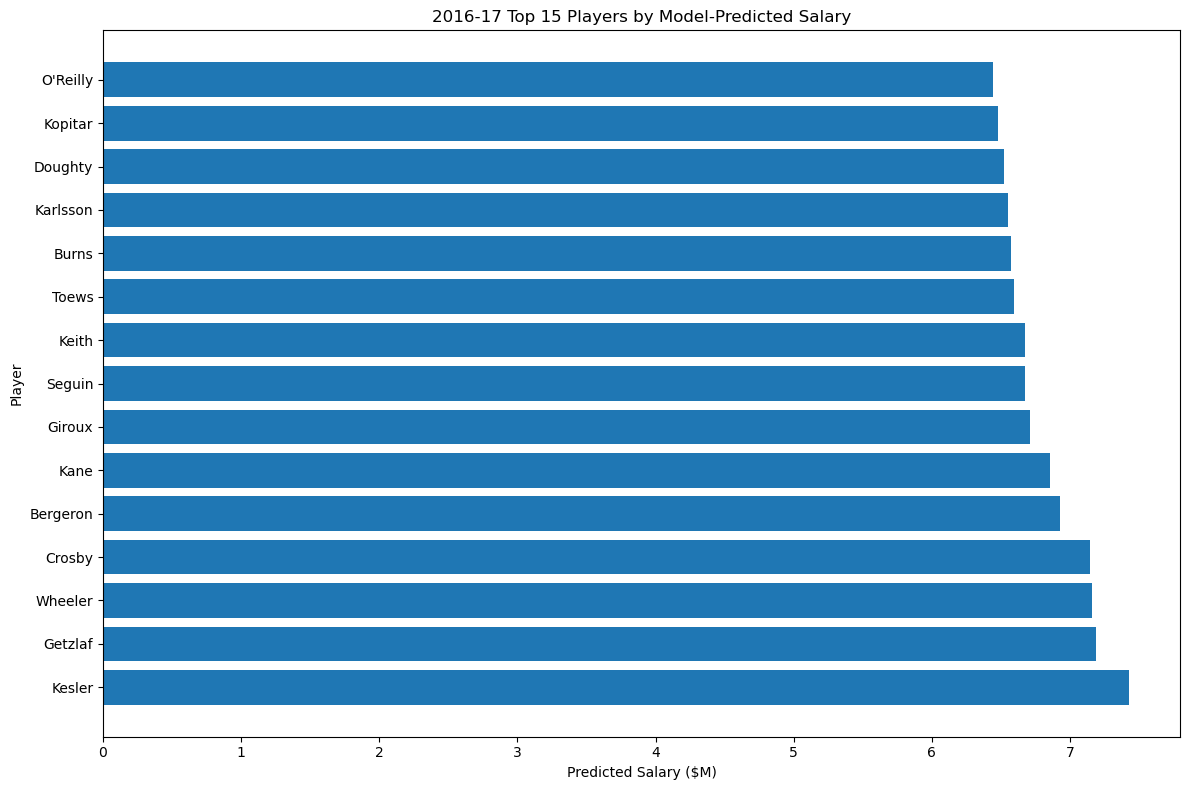

In [314]:
# Sort players by predicted salary
prediction_df['Predicted'] = prediction_df['Predicted'].astype(float)
top_predicted = prediction_df.nlargest(15, 'Predicted')

# Display results
print("\nTop 15 Players by Predicted Salary:")
print(top_predicted[['Player', 'Team', 'Predicted', 'Actual', 'Difference']]
      .to_string(index=False))

# Optional visualization
plt.figure(figsize=(12, 8))
plt.barh(top_predicted['Player'], top_predicted['Predicted'])
plt.xlabel('Predicted Salary ($M)')
plt.ylabel('Player')
plt.title('2016-17 Top 15 Players by Model-Predicted Salary')
plt.tight_layout()
plt.show()


- Kesler was often underappreciated due to lack of shockingly high point totals, can see here how the league values good all-around players, whose defensive metrics may be stronger than their flashy offense
- Strong trend of the model preferring more all around good players, not necessarily the highest point-scorers
- A lot of these guys are also on the 'biggest overpay list' despite the model still classifying them among the elites. Assumption can be made that the model dislikes teams forfeiting large percentages of their cap-space on one player, regardless of their talent

## New Signings Analysis

- Seeing that there are many players getting over or underpaid (and that a lot of these contracts were signed years before), lets continue examining the accuracy of the model with some specific case studies of players whose deals expired after this season, and had to sign a brand new contract in the summer of 2017.

In [315]:
# Function that accepts last name and team as input, expected salary as output
def predict_player_salary(lastName, team):
    
    # Get player stats using both last name and team
    player_features = df[(df['Last Name']==lastName) & (df['Team']==team)][features]
    
    # Check if player exists
    if len(player_features) == 0:
        print(f"\nNo player found with last name {lastName} on team {team}")
        return None
    
    # Scale the features using the same scaler used in training
    player_features_scaled = scaler.transform(player_features)
    
    # Make prediction
    predicted_salary = lasso_model.predict(player_features_scaled)[0]
    actual_salary = df[(df['Last Name'] == lastName) & (df['Team'] == team)]['Salary'].values[0]
    
    # Print results
    print(f"\n 2016-17 Salary Analysis for {lastName}:")
    print(f"Predicted Salary: ${predicted_salary/1_000_000:.2f}M")
    print(f"Actual Salary: ${actual_salary/1_000_000:.2f}M")
    print(f"Difference: ${(predicted_salary - actual_salary)/1_000_000:.2f}M")
    
    return predicted_salary


In [316]:
predict_player_salary('Boyle', 'T.B')
predict_player_salary('Shattenkirk', 'STL')
predict_player_salary('Marleau', 'S.J')
predict_player_salary('Cousins', 'PHI')



 2016-17 Salary Analysis for Boyle:
Predicted Salary: $2.73M
Actual Salary: $2.00M
Difference: $0.73M

 2016-17 Salary Analysis for Shattenkirk:
Predicted Salary: $4.71M
Actual Salary: $5.20M
Difference: $-0.49M

 2016-17 Salary Analysis for Marleau:
Predicted Salary: $4.61M
Actual Salary: $6.50M
Difference: $-1.89M

 2016-17 Salary Analysis for Cousins:
Predicted Salary: $2.34M
Actual Salary: $0.84M
Difference: $1.50M


2335548.044682572

Free Agency Signings (July 1, 2017): (These contracts began in the 2017-2018 season)

- NJD signed Brian Boyle: 2yr 5.1M     ======> 2.55m AAV (Predicted $2.73m, Difference 0.18m)

- NYR signed Kevin Shattenkirk: 4yr 26.6M ===> 6.65m AAV (Predicted $4.71m, Difference -1.94m) *Turned out to be the worst contract here (Team bought-out player before full term of deal)

- TOR signed Patrick Marleau: 3yr 18.75M  ===> 6.25m AAV (Predicted $4.61m, Difference -1.64m)

- ARI signed Nick Cousins: 2yr 4M       =====> 2.00m AAV (Predicted $2.34m, Difference 0.34m)

*Our predictions appear to be closer for contracts signed right AFTER this season, indicating that past season player preformance plays a large role in future contracts (not something accounted for in this model, due to the dataset only containing single season statistics, except for years of 'experience' column)

## Team Analysis

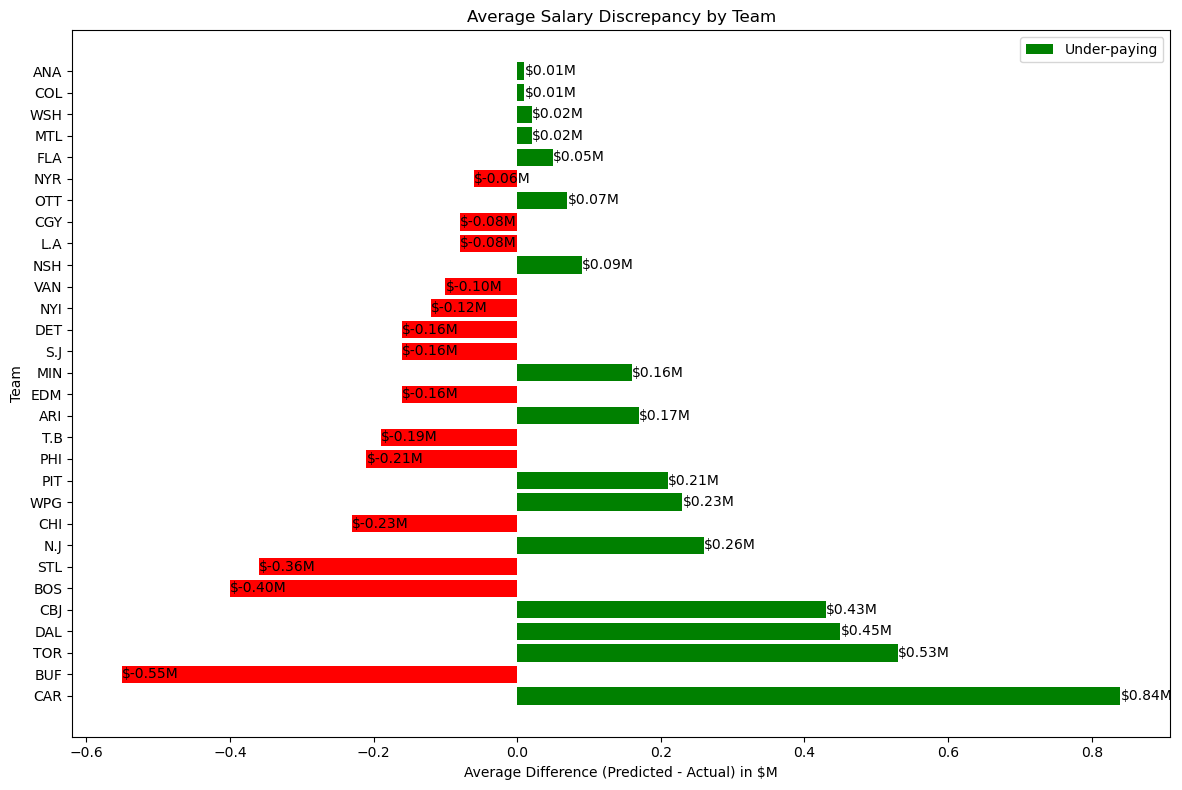


Team Salary Analysis:
      Avg Actual ($M)  Avg Predicted ($M)  Avg Difference ($M)
Team                                                          
CAR              1.75                2.59                 0.84
BUF              2.49                1.94                -0.55
TOR              2.06                2.58                 0.53
DAL              2.16                2.61                 0.45
CBJ              2.57                3.00                 0.43
BOS              2.87                2.46                -0.40
STL              2.92                2.55                -0.36
N.J              1.80                2.06                 0.26
CHI              3.17                2.94                -0.23
WPG              2.39                2.61                 0.23
PIT              2.42                2.63                 0.21
PHI              2.85                2.63                -0.21
T.B              2.29                2.09                -0.19
ARI              2.02           

In [317]:
# Calculate average discrepancy by team
team_discrepancy = prediction_df.groupby('Team').agg({
    'Actual': 'mean',
    'Predicted': 'mean',
    'Difference': 'mean'
}).round(2)

# Rename columns for clarity
team_discrepancy.columns = ['Avg Actual ($M)', 'Avg Predicted ($M)', 'Avg Difference ($M)']

# Sort by absolute average difference
team_discrepancy = team_discrepancy.sort_values(by='Avg Difference ($M)', key=abs, ascending=False)

# Create visualization
plt.figure(figsize=(12, 8))

# Color bars based on difference (green for underpaying, red for overpaying)
colors = ['green' if x > 0 else 'red' for x in team_discrepancy['Avg Difference ($M)']]
bars = plt.barh(team_discrepancy.index, team_discrepancy['Avg Difference ($M)'], color=colors)
plt.title('Average Salary Discrepancy by Team')
plt.legend(['Under-paying'])
plt.xlabel('Average Difference (Predicted - Actual) in $M')
plt.ylabel('Team')

# Add value labels on bars
for i, v in enumerate(team_discrepancy['Avg Difference ($M)']):
    text_color = 'white' if abs(v) > 2 else 'black'
    plt.text(v, i, f'${v:.2f}M', va='center', color=text_color)

plt.tight_layout()
plt.show()

# Print detailed team analysis
print("\nTeam Salary Analysis:")
print(team_discrepancy)


Looking at the team-by-team salary discrepancies, several interesting patterns emerge:


Most Efficient Teams:
- Carolina Hurricanes show remarkable efficiency, underpaying by an average of $0.84M while maintaining competitive performance, however it didn't show in their preformance as their efficient salary cap strategies lead to a mediocre to bad season, as they failed to make the playoffs.

- Toronto Maple Leafs and Dallas Stars also demonstrate strong value, underpaying by $0.53M and $0.45M respectively, neither team dominated the league, but also didn't stand out as bad teams.

- These teams appear to be getting strong performance relative to their salary expenditure, yet you wouldn't have guessed by looking at the standings at the end of the year.

Overpaying Teams:
- Buffalo stands out as significantly overpaying, with a -$0.55M average discrepancy. Predictively, they finished dead last in their division with only 33 wins in 82 games. Also notably bad the following season, with only 25 wins in 2017-18, good for last in the entire league. Here is a case where the model may be very accurately depicting a team that struggles in efficiently managing their salary cap (giving too much money to players who just weren't good enough), with these issues spreading into team preformance, as they couldn't pay the right players the right money.

- Boston (-$0.40M) and St. Louis (-$0.36M) also show notable overpayment patterns, however both teams had decent/good seasons

- These discrepancies often reflect veteran contracts and loyalty premiums, and sometimes maybe even just poor management






## Applications

This analysis provides valuable insights for NHL team management and salary cap planning. The model’s ability to identify market inefficiencies through statistical performance metrics offers teams a data-driven approach to player evaluation, potentially saving millions in salary negotiations. For example, the Carolina Hurricanes’ efficient salary structure (underpaying by $0.84M on average) demonstrates how teams can maintain competitiveness while optimizing payroll.


However, the model’s 46.4% accuracy highlights the complexity of NHL salary determination. Factors like leadership qualities, playoff experience, and market value significantly influence contracts but remain difficult to quantify. The case of Steven Stamkos illustrates this limitation - while injury limited his 2016-17 statistics, his overall value to the Tampa Bay Lightning extended far beyond measurable performance metrics for this season.


The analysis also reveals systematic patterns in team salary management. Teams like Buffalo showing consistent overpayment trends, while Toronto and Dallas demonstrated more efficient salary structures. These insights could help teams benchmark their salary decisions against league-wide patterns and identify opportunities for optimization.


The project’s focus on actual salary rather than cap hit presents both a strength and limitation. While actual salary reflects true team expenditure, cap hit analysis would provide more relevant insights for long-term roster planning and salary cap compliance. Additionally, expanding the dataset to include multiple seasons would likely improve prediction accuracy by accounting for performance consistency and career trajectories.

## Future Improvements

- Incorporating salary Cap Hit rather than actual salary would better reflect team management decisions (more in terms of the roster that management can build while adhearing to that specified cap)

- Multiple seasons of performance data could improve prediction accuracy (The model's biggest faults appearred to occur when a player had a major outlier season, including their stats from past years would help smooth that out)

- Additional features like playoff performance, marketing value, and leadership metrics could also enhance the model

Overall, this analysis demonstrates both the power and limitations of statistical approaches to player evaluation in the NHL, while highlighting contracts and teams that display efficient/inefficient salary management.